In [1]:
import pandas as pd
import numpy as np
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Keeping all gene/cells

In [15]:
#Counting how many genes/onts are in each file
for f_path in glob.glob('../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/*.csv'):
    df = pd.read_csv(f_path)
    print(f_path)
    print(df['gene'].nunique(),'genes')
    print(df['annotation'].nunique(),'onts')
    

../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/BICCN_mouse1_punctate_gene_ont.csv
251 genes
19 onts
../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/BICCN_mouse2_radial_gene_ont.csv
247 genes
19 onts
../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/BICCN_mouse2_punctate_gene_ont.csv
247 genes
19 onts
../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/BICCN_mouse2_peripheral_gene_ont.csv
252 genes
19 onts
../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/BICCN_mouse1_central_gene_ont.csv
252 genes
19 onts
../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/BICCN_mouse1_peripheral_gene_ont.csv
252 genes
19 onts
../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/BICCN_mouse1_radial_gene_ont.csv
251 genes
19 onts
../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/BICCN_mouse2_central_gene_ont.csv
252 genes
19 onts


In [16]:
metrics = ['peripheral','central','radial','punctate']
for metric in metrics:
    print(metric)
    f_paths = glob.glob('../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/*{}*.csv'.format(metric))
    df = pd.concat((pd.read_csv(p) for p in f_paths))
    
    print('Num genes',df['gene'].nunique())
    print('Num ontologies',df['annotation'].nunique())
    fraction_positive = df['med_score'].gt(0).sum()/len(df)
    print('Fraction ann/gene groups with a positive score {:.3f}'.format(
        fraction_positive
    ))
    
    print('Num tot ann/gene groups',df.groupby(['annotation','gene']).ngroups)
    
    sig_df = df[
        df['bh_p'].le(0.05) &
        df['med_gene_spots'].ge(2)
    ]
    
    print('Num sig genes',sig_df['gene'].nunique())
    print('Frac sig genes',sig_df['gene'].nunique()/df['gene'].nunique())
    print('Num sig ontologies',sig_df['annotation'].nunique())
    
    num_sig_groups = sig_df.groupby(['annotation','gene']).ngroups
    print('Num sig ann/gene groups',num_sig_groups)
    
    
    num_high_expression_groups = df[df['med_gene_spots'].ge(5)].groupby(['annotation','gene']).ngroups
    num_sig_high_expression_groups = df[
        df['med_gene_spots'].ge(5) &
        df['bh_p'].le(0.05)
    ].groupby(['annotation','gene']).ngroups
    
    
    print('Num sig ann/gene groups >=5 med_gene_spots',num_sig_high_expression_groups)
    print('Num tot ann/gene groups >=5 med_gene_spots',num_high_expression_groups)
    print('Frac sig ann/gene groups >=5 med_gene_spots',num_sig_high_expression_groups/num_high_expression_groups)
    
    fraction_positive = sig_df['med_score'].gt(0).sum()/len(sig_df)
    print('Fraction sig ann/gene groups with a positive score {:.3f}'.format(
        fraction_positive
    ))
    
    num_groups_same_effect = sig_df.groupby(['annotation','gene'])['med_score'].prod().gt(0).sum()
    print('Number sig ann/gene groups with same direction of effect {}'.format(
        num_groups_same_effect
    ))
    
    print('Fraction sig ann/gene groups with same direction of effect {:.3f}'.format(
        num_groups_same_effect/num_sig_groups
    ))
    
    print('There are Blank- MERFISH genes in the significant group',sig_df['gene'].str.contains('Blank-').any())
    print('')
    


peripheral
Num genes 220
Num ontologies 19
Fraction ann/gene groups with a positive score 0.555
Num tot ann/gene groups 1999
Num sig genes 209
Frac sig genes 0.95
Num sig ontologies 19
Num sig ann/gene groups 1511
Num sig ann/gene groups >=5 med_gene_spots 1511
Num tot ann/gene groups >=5 med_gene_spots 1999
Frac sig ann/gene groups >=5 med_gene_spots 0.7558779389694847
Fraction sig ann/gene groups with a positive score 0.587
Number sig ann/gene groups with same direction of effect 1312
Fraction sig ann/gene groups with same direction of effect 0.868
There are Blank- MERFISH genes in the significant group False

central
Num genes 220
Num ontologies 19
Fraction ann/gene groups with a positive score 0.446
Num tot ann/gene groups 1999
Num sig genes 210
Frac sig genes 0.9545454545454546
Num sig ontologies 19
Num sig ann/gene groups 1492
Num sig ann/gene groups >=5 med_gene_spots 1492
Num tot ann/gene groups >=5 med_gene_spots 1999
Frac sig ann/gene groups >=5 med_gene_spots 0.7463731865932

# Blank-gene scores with all gene/ont data


Goal is to use the Blank-genes as known false-positives as a metric fro SPRAWL performance

In [7]:
f_paths = glob.glob('../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/*.csv')
df = pd.concat(pd.read_csv(f_path) for f_path in f_paths)


#df = df[df['med_gene_spots'].ge(2)] #ignore gene/cell-types with fewer than median 2 spots

df['Significant'] = df['bh_p'].le(0.05)
df['Blank'] = df['gene'].str.startswith('Blank-')

df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,Significant,Blank
0,BICCN_mouse1,m1s1,puncta,Acta2,L23_IT,1062,5.0,572.0,-0.059000,-2.051324,4.023544e-02,6.036858e-02,False,False
1,BICCN_mouse1,m1s1,puncta,Acta2,L5_ET,200,5.0,932.5,-0.038000,-0.900757,3.677176e-01,4.309342e-01,False,False
2,BICCN_mouse1,m1s1,puncta,Acta2,L5_IT,862,6.0,714.0,-0.117000,-3.731409,1.904116e-04,4.585804e-04,True,False
3,BICCN_mouse1,m1s1,puncta,Acta2,L6_CT,505,5.0,425.0,-0.190000,-4.589868,4.435263e-06,1.374089e-05,True,False
4,BICCN_mouse1,m1s1,puncta,Acta2,L6_IT,518,5.0,634.5,-0.152000,-3.317317,9.088658e-04,1.923848e-03,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,BICCN_mouse2,m2s5,central,Zfp804b,L5_ET,30,5.5,1242.0,0.223805,4.119615,3.795056e-05,8.845363e-05,True,False
1807,BICCN_mouse2,m2s5,central,Zfp804b,L6_CT,39,5.0,426.0,0.146110,1.146806,2.514618e-01,3.108514e-01,False,False
1808,BICCN_mouse2,m2s3,central,Zfp804b,L6_IT,55,5.0,657.0,0.350877,5.492997,3.951692e-08,1.200757e-07,True,False
1809,BICCN_mouse2,m2s3,central,Zfp804b,Lamp5,60,6.5,733.5,0.351815,7.812407,5.551115e-15,2.604422e-14,True,False


In [8]:
df.groupby('metric')['med_gene_spots'].min()

metric
central    5.0
periph     5.0
puncta     5.0
radial     5.0
Name: med_gene_spots, dtype: float64

In [10]:
#With the 5-filter all the Blanks are removed
#Without the 5-filter, the Blanks are retained and not very significant

df[df['Blank']].groupby(['metric','Significant']).size()

Series([], dtype: int64)

In [38]:
df[df['Blank']].groupby('metric')['bh_p'].min()

metric
central     0.000000e+00
periph     2.138925e-158
puncta      9.677231e-12
radial      1.851823e-02
Name: bh_p, dtype: float64

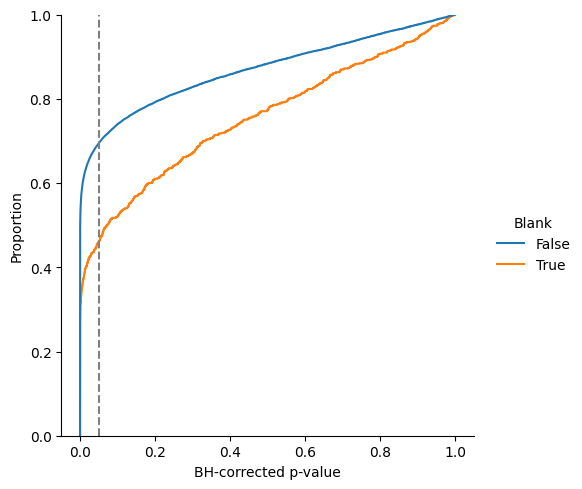

In [39]:
sns.displot(
    x = 'bh_p',
    hue = 'Blank',
    kind = 'ecdf',
    data = df,
)
plt.axvline(0.05, linestyle='dashed', color='grey')
plt.xlabel('BH-corrected p-value')
plt.show()
plt.close()

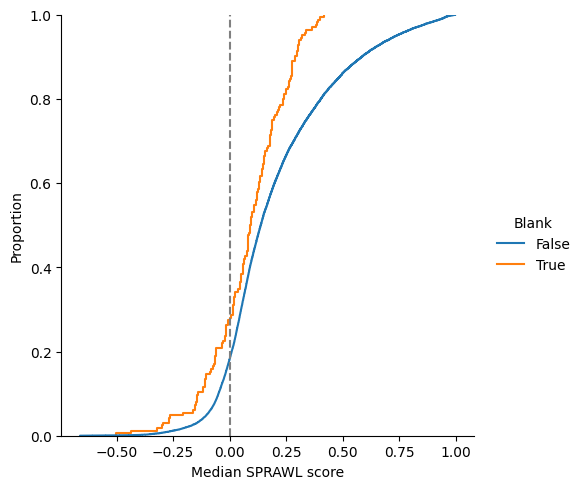

In [92]:
sns.displot(
    x = 'med_score',
    hue = 'Blank',
    kind = 'ecdf',
    data = df,
)
plt.axvline(0.0, linestyle='dashed', color='grey')
plt.xlabel('Median SPRAWL score')
plt.show()
plt.close()

Blank
False    489.0
True      52.0
Name: num_cells, dtype: float64


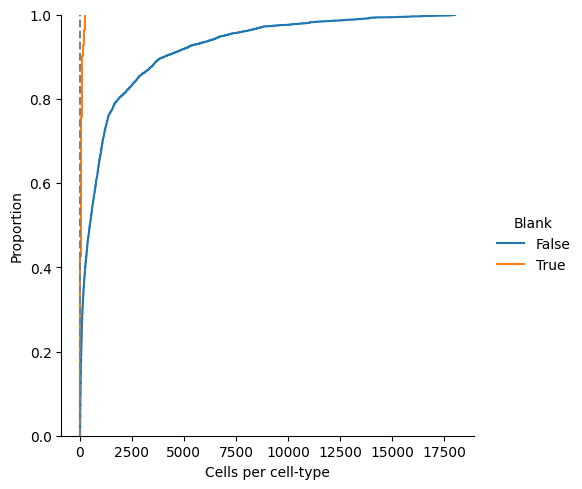

In [96]:
print(df.groupby('Blank')['num_cells'].median())

sns.displot(
    x = 'num_cells',
    hue = 'Blank',
    kind = 'ecdf',
    data = df,
)
plt.axvline(0.0, linestyle='dashed', color='grey')
plt.xlabel('Cells per cell-type')
plt.show()
plt.close()

In [40]:
for metric,metric_df in df.groupby('metric'):
    if not metric_df['Blank'].any():
        continue
        
    best_blank_p = metric_df[metric_df['Blank']]['bh_p'].min()
    
    print(metric)
    print('There are',metric_df[metric_df['bh_p'].le(0.05)]['gene'].nunique(),'significant unique genes')
    print('There are',metric_df[metric_df['bh_p'].le(best_blank_p)]['gene'].nunique(),'unique genes more significant than best blank')
    print('')

central
There are 252 significant unique genes
There are 153 unique genes more significant than best blank

periph
There are 252 significant unique genes
There are 121 unique genes more significant than best blank

puncta
There are 248 significant unique genes
There are 191 unique genes more significant than best blank

radial
There are 241 significant unique genes
There are 232 unique genes more significant than best blank



In [81]:
best_blank_p

0.0185182340804982

# Filtering out gene/cells with fewer than 5 counts

In [13]:
#Counting how many genes/onts are in each file
for f_path in glob.glob('../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/*.csv'):
    df = pd.read_csv(f_path)
    print(f_path)
    print(df['gene'].nunique(),'genes')
    print(df['annotation'].nunique(),'onts')
  

../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/BICCN_mouse1_punctate_gene_ont.csv
220 genes
19 onts
../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/BICCN_mouse2_radial_gene_ont.csv
218 genes
19 onts
../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/BICCN_mouse2_punctate_gene_ont.csv
218 genes
19 onts
../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/BICCN_mouse2_peripheral_gene_ont.csv
218 genes
19 onts
../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/BICCN_mouse1_central_gene_ont.csv
220 genes
19 onts
../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/BICCN_mouse1_peripheral_gene_ont.csv
220 genes
19 onts
../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/BICCN_mouse1_radial_gene_ont.csv
220 genes
19 onts
../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/BICCN_mouse2_central_gene_ont.csv
218 genes
19 onts


In [14]:
metrics = ['peripheral','central','radial','punctate']
for metric in metrics:
    print(metric)
    f_paths = glob.glob('../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/*{}*.csv'.format(metric))
    df = pd.concat((pd.read_csv(p) for p in f_paths))
    
    print('Num genes',df['gene'].nunique())
    print('Num ontologies',df['annotation'].nunique())
    fraction_positive = df['med_score'].gt(0).sum()/len(df)
    print('Fraction ann/gene groups with a positive score {:.3f}'.format(
        fraction_positive
    ))
    
    print('Num tot ann/gene groups',df.groupby(['annotation','gene']).ngroups)
    
    sig_df = df[
        df['bh_p'].le(0.05) &
        df['med_gene_spots'].ge(2)
    ]
    
    print('Num sig genes',sig_df['gene'].nunique())
    print('Frac sig genes',sig_df['gene'].nunique()/df['gene'].nunique())
    print('Num sig ontologies',sig_df['annotation'].nunique())
    
    num_sig_groups = sig_df.groupby(['annotation','gene']).ngroups
    print('Num sig ann/gene groups',num_sig_groups)
    
    
    num_high_expression_groups = df[df['med_gene_spots'].ge(5)].groupby(['annotation','gene']).ngroups
    num_sig_high_expression_groups = df[
        df['med_gene_spots'].ge(5) &
        df['bh_p'].le(0.05)
    ].groupby(['annotation','gene']).ngroups
    
    
    print('Num sig ann/gene groups >=5 med_gene_spots',num_sig_high_expression_groups)
    print('Num tot ann/gene groups >=5 med_gene_spots',num_high_expression_groups)
    print('Frac sig ann/gene groups >=5 med_gene_spots',num_sig_high_expression_groups/num_high_expression_groups)
    
    fraction_positive = sig_df['med_score'].gt(0).sum()/len(sig_df)
    print('Fraction sig ann/gene groups with a positive score {:.3f}'.format(
        fraction_positive
    ))
    
    num_groups_same_effect = sig_df.groupby(['annotation','gene'])['med_score'].prod().gt(0).sum()
    print('Number sig ann/gene groups with same direction of effect {}'.format(
        num_groups_same_effect
    ))
    
    print('Fraction sig ann/gene groups with same direction of effect {:.3f}'.format(
        num_groups_same_effect/num_sig_groups
    ))
    
    print('There are Blank- MERFISH genes in the significant group',sig_df['gene'].str.contains('Blank-').any())
    print('')
    


peripheral
Num genes 220
Num ontologies 19
Fraction ann/gene groups with a positive score 0.555
Num tot ann/gene groups 1999
Num sig genes 209
Frac sig genes 0.95
Num sig ontologies 19
Num sig ann/gene groups 1511
Num sig ann/gene groups >=5 med_gene_spots 1511
Num tot ann/gene groups >=5 med_gene_spots 1999
Frac sig ann/gene groups >=5 med_gene_spots 0.7558779389694847
Fraction sig ann/gene groups with a positive score 0.587
Number sig ann/gene groups with same direction of effect 1312
Fraction sig ann/gene groups with same direction of effect 0.868
There are Blank- MERFISH genes in the significant group False

central
Num genes 220
Num ontologies 19
Fraction ann/gene groups with a positive score 0.446
Num tot ann/gene groups 1999
Num sig genes 210
Frac sig genes 0.9545454545454546
Num sig ontologies 19
Num sig ann/gene groups 1492
Num sig ann/gene groups >=5 med_gene_spots 1492
Num tot ann/gene groups >=5 med_gene_spots 1999
Frac sig ann/gene groups >=5 med_gene_spots 0.7463731865932

In [18]:
1999/4180

0.47822966507177034

In [17]:
220*19

4180

In [ ]:
1999

# Direction of effect

In [52]:
f_paths = glob.glob('../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/*.csv')
df = pd.concat(pd.read_csv(f_path) for f_path in f_paths)
df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p
0,BICCN_mouse1,m1s1,puncta,Acta2,L23_IT,1062,5.0,572.0,-0.059000,-2.051324,4.023544e-02,6.036858e-02
1,BICCN_mouse1,m1s1,puncta,Acta2,L5_ET,200,5.0,932.5,-0.038000,-0.900757,3.677176e-01,4.309342e-01
2,BICCN_mouse1,m1s1,puncta,Acta2,L5_IT,862,6.0,714.0,-0.117000,-3.731409,1.904116e-04,4.585804e-04
3,BICCN_mouse1,m1s1,puncta,Acta2,L6_CT,505,5.0,425.0,-0.190000,-4.589868,4.435263e-06,1.374089e-05
4,BICCN_mouse1,m1s1,puncta,Acta2,L6_IT,518,5.0,634.5,-0.152000,-3.317317,9.088658e-04,1.923848e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
1806,BICCN_mouse2,m2s5,central,Zfp804b,L5_ET,30,5.5,1242.0,0.223805,4.119615,3.795056e-05,8.845363e-05
1807,BICCN_mouse2,m2s5,central,Zfp804b,L6_CT,39,5.0,426.0,0.146110,1.146806,2.514618e-01,3.108514e-01
1808,BICCN_mouse2,m2s3,central,Zfp804b,L6_IT,55,5.0,657.0,0.350877,5.492997,3.951692e-08,1.200757e-07
1809,BICCN_mouse2,m2s3,central,Zfp804b,Lamp5,60,6.5,733.5,0.351815,7.812407,5.551115e-15,2.604422e-14


In [53]:
score_by_experiment = df.pivot(
    index = ['metric','gene','annotation'],
    columns = 'experiment',
    values = 'med_score',
)

score_by_experiment

experiment                  BICCN_mouse1  BICCN_mouse2
metric  gene    annotation                            
central Acta2   L23_IT         -0.146838     -0.141625
                L5_ET          -0.168858           NaN
                L5_IT          -0.147634     -0.079495
                L6_CT          -0.129952           NaN
                L6_IT          -0.195968     -0.087528
...                                  ...           ...
radial  Zfp804b L6_CT           0.232000     -0.082000
                L6_IT           0.280000      0.398000
                L6_IT_Car3      0.202000           NaN
                Lamp5          -0.035000      0.162000
                Pvalb           0.132000      0.314000

[7996 rows x 2 columns]

In [54]:
#6214 of 7996 (77.7%) of gene/cell-types over all metrics have the same direction of effect
score_by_experiment['BICCN_mouse1'].multiply(score_by_experiment['BICCN_mouse2']).gt(0).sum()

6214

In [56]:
#taking the median of numeric columns across the two experiments
agg_df = df.groupby(['metric','gene','annotation']).median().reset_index()
agg_df

,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p
0,central,Acta2,L23_IT,579.0,5.00,682.50,-0.144232,-7.485357,2.813012e-04,5.802237e-04
1,central,Acta2,L5_ET,200.0,5.00,932.50,-0.168858,-6.942265,3.858620e-12,1.420146e-11
2,central,Acta2,L5_IT,463.0,5.50,792.00,-0.113564,-6.301331,3.668736e-02,5.260555e-02
3,central,Acta2,L6_CT,505.0,5.00,425.00,-0.129952,-8.336312,7.664360e-17,3.539344e-16
4,central,Acta2,L6_IT,276.0,5.00,761.75,-0.141748,-5.993526,1.569788e-02,2.419478e-02
...,...,...,...,...,...,...,...,...,...,...
7991,radial,Zfp804b,L6_CT,73.5,5.00,410.25,0.075000,1.693771,4.616194e-01,4.692090e-01
7992,radial,Zfp804b,L6_IT,106.0,5.00,641.00,0.339000,3.621424,4.711519e-04,1.158318e-03
7993,radial,Zfp804b,L6_IT_Car3,79.0,6.00,843.00,0.202000,2.042544,4.109756e-02,6.063981e-02
7994,radial,Zfp804b,Lamp5,64.0,6.25,682.00,0.063500,0.954121,3.411440e-01,3.940787e-01


In [69]:
q = agg_df.groupby(['gene','metric'])['bh_p'].apply(lambda ps: any(ps < 0.05)).reset_index()
q = q.rename(columns={'bh_p':'at_least_one_sig_celltype'})
q

,gene,metric,at_least_one_sig_celltype
0,Acta2,central,True
1,Acta2,periph,True
2,Acta2,puncta,True
3,Acta2,radial,True
4,Adamts2,central,True
...,...,...,...
875,Wnt7b,radial,True
876,Zfp804b,central,True
877,Zfp804b,periph,True
878,Zfp804b,puncta,True


In [72]:
at_least_one_sig_celltype_all_metrics = q.groupby('gene')['at_least_one_sig_celltype'].apply(all)
at_least_one_sig_celltype_all_metrics

gene
Acta2       True
Adamts2     True
Adamts4     True
Adra1b      True
Alk         True
           ...  
Vtn         True
Vwc2       False
Wipf3       True
Wnt7b       True
Zfp804b     True
Name: at_least_one_sig_celltype, Length: 220, dtype: bool

In [73]:
at_least_one_sig_celltype_all_metrics.sum()

176

In [74]:
len(at_least_one_sig_celltype_all_metrics)

220

In [81]:
#all 19 cell-types are significant with at least one gene in all 4 metrics
agg_df.groupby(['annotation','metric'])['med_score'].apply(lambda ps: any(ps < 0.05)).groupby('annotation').all()

annotation
Astro         True
Endo          True
L23_IT        True
L56_NP        True
L5_ET         True
L5_IT         True
L6_CT         True
L6_IT         True
L6_IT_Car3    True
L6b           True
Lamp5         True
OPC           True
Oligo         True
Pvalb         True
SMC           True
Sncg          True
Sst           True
VLMC          True
Vip           True
Name: med_score, dtype: bool

# Plotting individual cells for Figure 4

In [151]:
import sprawl
from sprawl import plotting

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

In [137]:
sample_to_path = {
    'm1s1':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample1.hdf5',
    'm1s2':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample2.hdf5',
    'm1s3':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample3.hdf5',
    'm1s4':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample4.hdf5',
    'm1s5':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample5.hdf5',
    'm1s6':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample6.hdf5',
    'm2s1':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse2sample1.hdf5',
    'm2s2':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse2sample2.hdf5',
    'm2s3':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse2sample3.hdf5',
    'm2s4':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse2sample4.hdf5',
    'm2s5':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse2sample5.hdf5',
    'm2s6':'/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse2sample6.hdf5',
}
sample_to_path

{'m1s1': '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample1.hdf5',
 'm1s2': '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample2.hdf5',
 'm1s3': '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample3.hdf5',
 'm1s4': '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample4.hdf5',
 'm1s5': '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample5.hdf5',
 'm1s6': '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse1sample6.hdf5',
 'm2s1': '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse2sample1.hdf5',
 'm2s2': '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse2sample2.hdf5',
 'm2s3': '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/inputs/hdf5s/BICCN_mouse2sample3

central Slc32a1 L5_IT


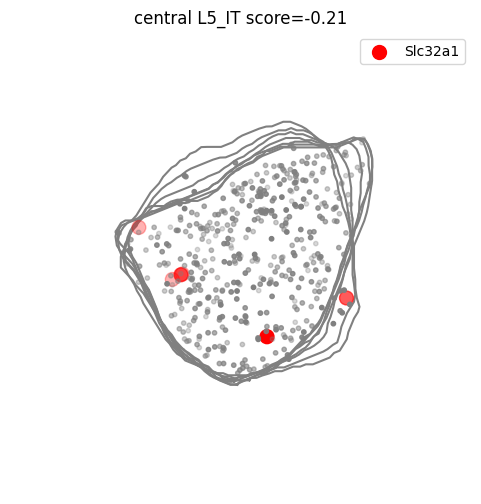

central Slc32a1 L6_CT


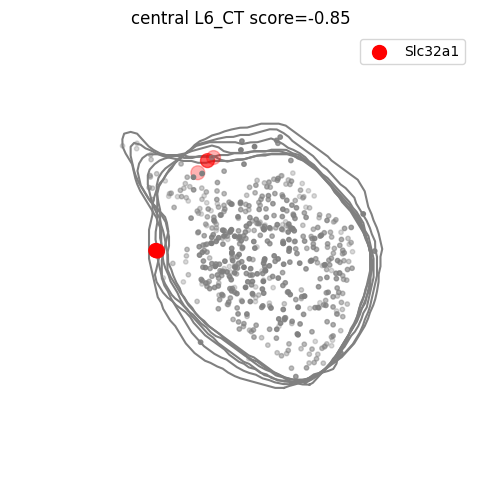

central Slc32a1 Sncg


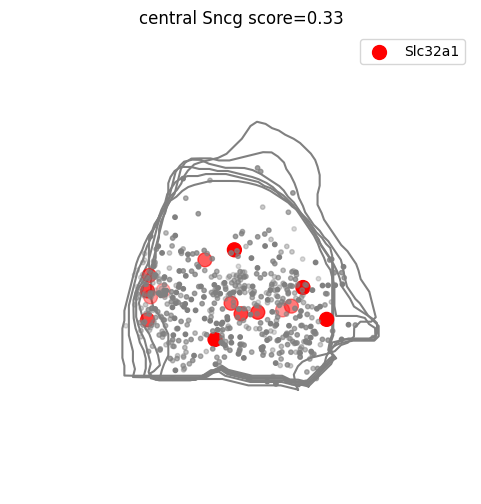

central Slc32a1 Sst


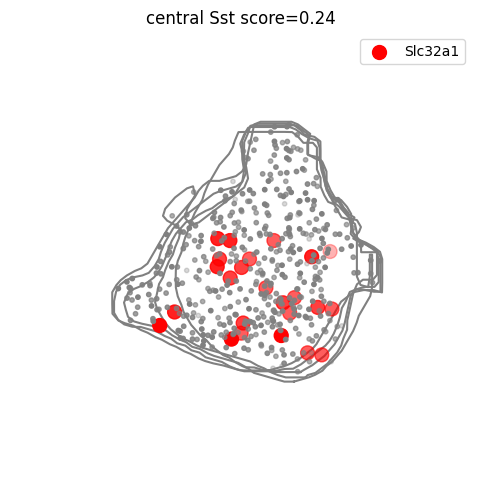

radial Cxcl14 Astro


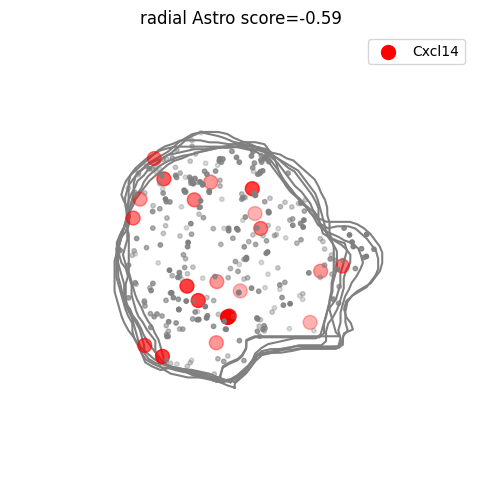

radial Cxcl14 L6_CT


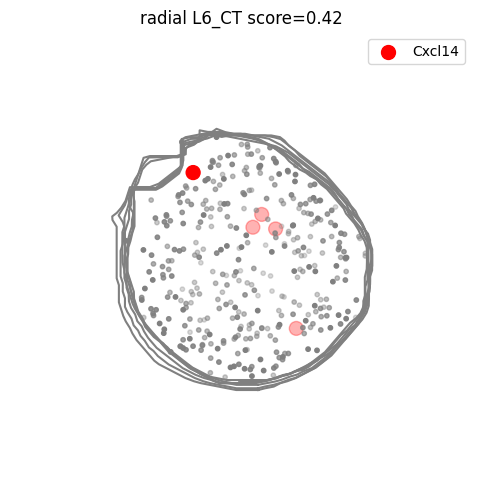

radial Cxcl14 L6_IT


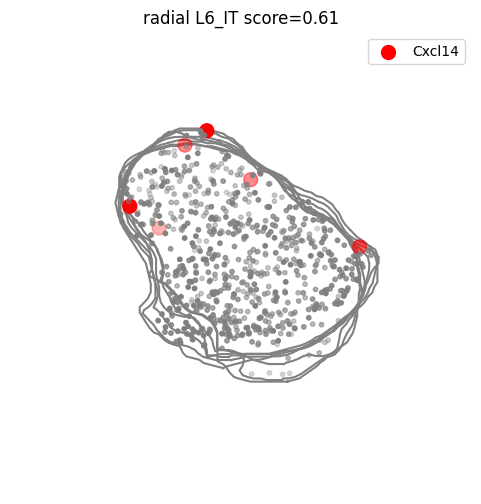

radial Cxcl14 Vip


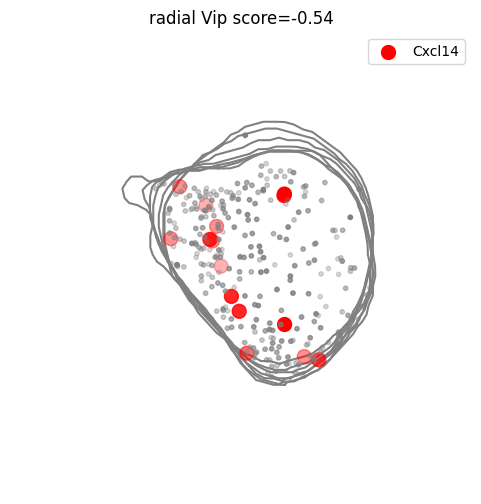

puncta Nxph1 L23_IT


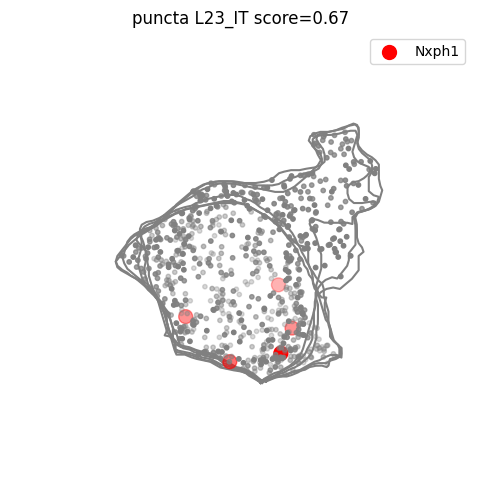

puncta Nxph1 L5_IT


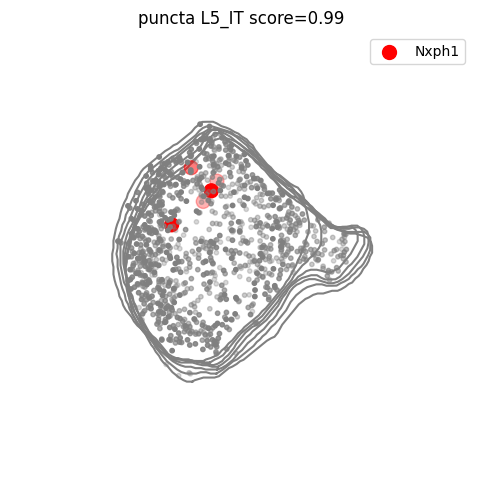

puncta Nxph1 Pvalb


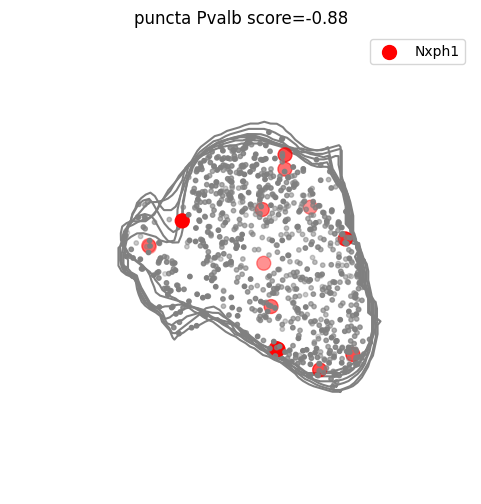

puncta Nxph1 Sst


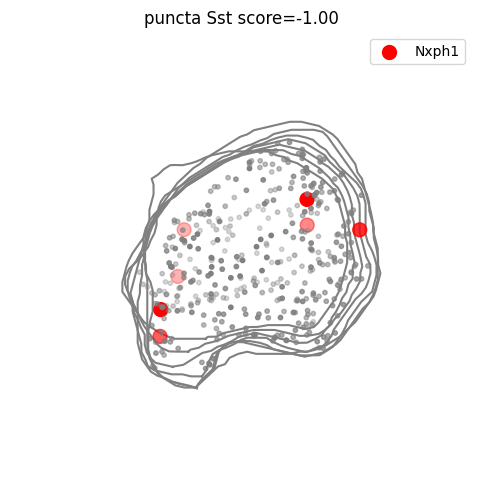

In [168]:
np.random.seed(1)

thresh = 0.2
num_plots_per_ct = 1

metric_gene_ct_dir = {
    ('central','Slc32a1'):(('L6_CT','L5_IT','Sncg','Sst'),(-1,-1,+1,+1)),
    ('radial','Cxcl14'):(('Vip','Astro','L6_IT','L6_CT'),(-1,-1,+1,+1)),
    ('puncta','Nxph1'):(('Pvalb','Sst','L23_IT','L5_IT'),(-1,-1,+1,+1)),
}


f_path_stem = '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_cell'

for (metric,gene),(cts,dirs) in metric_gene_ct_dir.items():
    f_paths = glob.glob(os.path.join(f_path_stem,f'*{metric}*'))
    
    sub_dfs = []
    for f_path in f_paths:
        sub_df = pd.read_csv(f_path)
        sub_df = sub_df[sub_df['gene'].eq(gene) & sub_df['annotation'].isin(cts)]
        
        extreme_cell = sub_df['annotation'].map(dict(zip(cts,dirs))).multiply(sub_df['score']).ge(thresh)
        
        sub_dfs.append(sub_df[extreme_cell]) #filters to only extreme cells
        
    df = pd.concat(sub_dfs)
    
    for ann,g in df.groupby('annotation'):
        print(metric,gene,ann)
        cells_to_plot = g.sample(num_plots_per_ct)
        
        for i,r in cells_to_plot.iterrows():
            hdf5 = sprawl.HDF5(sample_to_path[r['sample']])
            cell = hdf5.get_cells_by_id([r['cell_id']])[0]
            fig,ax = plotting.plot_cell_3D(cell, gene_colors={r['gene']:'red'})
            ax.view_init(90,0)
            plt.title(f'{metric} {ann} score={r.score:0.2f}')
            plt.show()
            plt.close()
    